In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plot_likert

In [2]:
PA = pd.read_csv('Files/CR-studentexperiences.csv', header = 1)

**Q1** Will the time taken for the users to enter a set of characters using Character Recorder be roughly the same as the time taken using Excel?

In [3]:
EX = pd.to_datetime(PA["end.1"][9:]) - pd.to_datetime(PA["start.1"][9:])
CR = pd.to_datetime(PA["end.2"][9:]) - pd.to_datetime(PA["start.2"][9:])
TU = pd.to_datetime(PA["end"][9:]) - pd.to_datetime(PA["start"][9:])

Using paird t-test to analysis two paired data's relationship

In [4]:
stats.ttest_rel(EX, CR)

Ttest_relResult(statistic=-2.4552412459617647, pvalue=0.02776240255818241)

In [5]:
stats.ttest_rel(TU, CR)

Ttest_relResult(statistic=4.652527341826689, pvalue=0.0003732899722582638)

Use pearson correlation to check if people who are slow with Excel were also slow with CR

In [6]:
stats.pearsonr(EX.dt.seconds, CR.dt.seconds)

(-0.004478438896139775, 0.9873619874039541)

In [7]:
EX.dt.seconds

9      942
10     519
11     394
12     270
13     364
14     416
15     349
16     500
17    1534
18     303
19     250
20     426
21     459
22     359
23     225
dtype: int64

In [8]:
new = str()
for i in EX.dt.seconds:
    new += str(i)
    new += str(",")
new

'942,519,394,270,364,416,349,500,1534,303,250,426,459,359,225,'

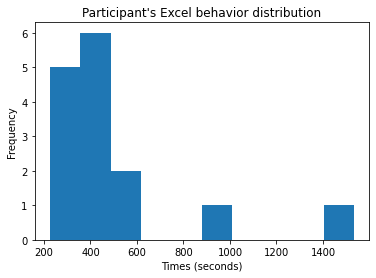

In [9]:
EX.mean()
EX.astype('timedelta64[s]').plot.hist()

plt.title("Participant's Excel behavior distribution")
plt.xlabel("Times (seconds)") 
plt.savefig(os.path.join('Pics/Guilding Analysis/Q1/EX-behavior.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

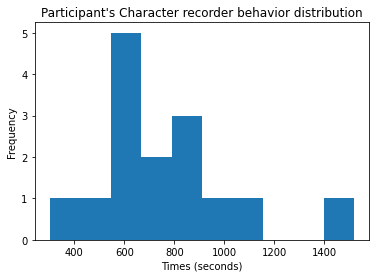

In [10]:
CR.mean()
CR.astype('timedelta64[s]').plot.hist()

plt.title("Participant's Character recorder behavior distribution")
plt.xlabel("Times (seconds)") 
plt.savefig(os.path.join('Pics/Guilding Analysis/Q1/CR-behavior.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

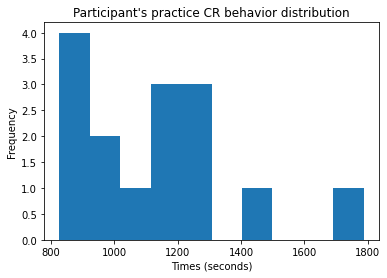

In [11]:
TU.mean()
TU.astype('timedelta64[s]').plot.hist()

plt.title("Participant's practice CR behavior distribution")
plt.xlabel("Times (seconds)") 
plt.savefig(os.path.join('Pics/Guilding Analysis/Q1/TU-behavior.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

We find out that the main value can not represent the user's time spent on the software based on the graph. So we will keep using the Box chart to explore more information. 

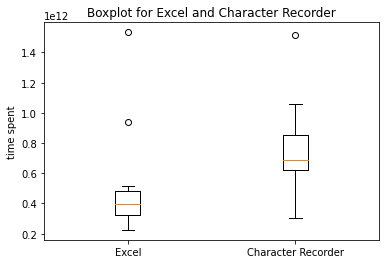

In [12]:
data_1 = EX
data_2 = CR
data = [data_1, data_2]

plt.boxplot(data)
plt.xticks([1, 2], ["Excel", "Character Recorder"])
plt.title("Boxplot for Excel and Character Recorder")
plt.ylabel("time spent")
plt.savefig(os.path.join('Pics/Guilding Analysis/Q1/Boxplot.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


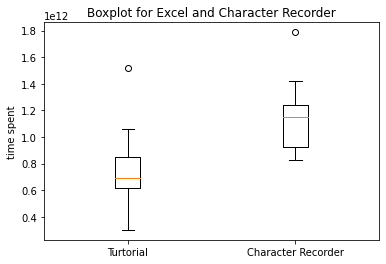

In [13]:
data_1 = CR
data_2 = TU
data = [data_1, data_2]

plt.boxplot(data)
plt.xticks([1, 2], ["Turtorial", "Character Recorder"])
plt.title("Boxplot for Excel and Character Recorder")
plt.ylabel("time spent")
plt.savefig(os.path.join('Pics/Guilding Analysis/Q1/Turtorial and Task Boxplot.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


After we look through Boxplot, we find out that there are two outliers in EX and one in CR. So, in the next step, We will remove those outliers and get their mean and median time.

In [14]:
def outlier_remove(col):

    mid = col.quantile(0.75) - col.quantile(0.25)

    top = col.quantile(0.75) + 1.5 * mid
    bot = col.quantile(0.25) - 1.5 * mid

    def remove(x):
        if x <= top and x >= bot:
            return x

    return col.map(remove)

In [15]:
New_CR = outlier_remove(CR).dropna()
New_EX = outlier_remove(EX).dropna()
New_TU = outlier_remove(TU).dropna()

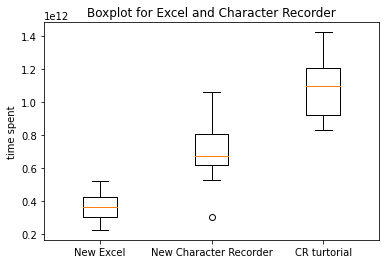

In [16]:
data_1 = New_EX
data_2 = New_CR
data_3 = New_TU
data = [data_1, data_2, data_3]

plt.boxplot(data)
plt.xticks([1, 2, 3], ["New Excel", "New Character Recorder", "CR turtorial"])
plt.title("Boxplot for Excel and Character Recorder")
plt.ylabel("time spent")
plt.savefig(os.path.join('Pics/Guilding Analysis/Q1/New-Boxplot.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

In [17]:
print('Excel Median time spent : ' + str(New_EX.median()))
print('Excel Mean time spent : ' +  str(New_EX.mean()))

Excel Median time spent : 0 days 00:06:04
Excel Mean time spent : 0 days 00:06:11.846153846


In [18]:
print('Character Recorder Median time spent : ' + str(New_CR.median()))
print('Character Recorder Mean time spent : ' +  str(New_CR.mean()))

Character Recorder Median time spent : 0 days 00:11:14.500000
Character Recorder Mean time spent : 0 days 00:11:50.571428571


In [19]:
print('Character Recorder Median time spent : ' + str(New_TU.median()))
print('Character Recorder Mean time spent : ' +  str(New_TU.mean()))

Character Recorder Median time spent : 0 days 00:18:13.500000
Character Recorder Mean time spent : 0 days 00:17:59.071428571


After we delete outlier, we will get the t-test result

In [20]:
New_CR = outlier_remove(New_CR).dropna()
len(New_CR)

13

Compare two different software (Excel and Character Recorder); Whether there is a significant difference in the time spent by users. Through the comparative analysis of the two sets of data, it is judged whether character Recorder is a software that is more suitable for entering such information than excel. 

Firstly, we set the null hypothesis that the character recorder didn't have many differences between excel in input terms. After using the paired t-test, we got a p-value of less than 0.05 (1.3398e-07). So we reject the null hypothesis that character recorders have many differences between Excel.

In [21]:
stats.ttest_rel(New_EX, New_CR)

Ttest_relResult(statistic=-10.944205270380335, pvalue=1.3398628969046098e-07)

Drop the maximum value in Turtorial and calculate the paired t-test between CR and Turtorial.

In [22]:
stats.ttest_rel(New_CR, New_TU.drop(10))

Ttest_relResult(statistic=-5.164801306872204, pvalue=0.00023516214443738585)

Drop the maximum value in Turtorial and calculate the paired t-test between CR and Turtorial.

In [23]:
stats.ttest_rel(New_CR, New_TU.drop(23))

Ttest_relResult(statistic=-7.1378633714077635, pvalue=1.1839376367330832e-05)

**Q2** Will the data entered using Character Recorder be more consistent than the data entered using Excel? 

In this question, we go throught character recorder and Excel files and count words. 

In [24]:
# Count excel words
def excel_word_detach():
    # read excel files and fill NA values as "of", trans interger to string
    folder = os.listdir("Experiment Files")
    folder.remove('.DS_Store')
    d={}

    for i in folder:
        test = pd.read_excel("Experiment Files/" + i + "/" + i + ".xlsx").fillna("of").astype(str)
        # remove stopwords (e.g., of, the, or) and create empty list to store values
        remove = ["of", "the", "or", "_", "…"]
        store = []

        # store non-na value into store
        for i in test:
            for p in test[i]:
                if p not in remove:
                    store.append(p.split())

        # store non-stopwords value into word_count
        word_count = []
        for q in store:
            for c in q:
                if c not in remove:
                    word_count.append(c)
        
        # store and count value, store those value and words into dictionary d
        for x in word_count:
            if not x in d:
                d[x]=1
            else:
                d[x]=d[x]+1
    return d

In [55]:
orders = excel_word_detach()
last_sort_orders_excel = {}

# Store words as dictionary, and set key as lower key.
alphabet = dict()
# alphabet =  {k.lower(): v for k, v in last_orders.items()}

for p, q in orders.items():
    if p.lower() in alphabet:
       alphabet[p.lower()] = alphabet[p.lower()] + q
    else:
       alphabet[p.lower()] = q


sort_orders = sorted(alphabet.items(), key=lambda x: x[1], reverse=False)

punctuations = ";:.,"
key_list = ()
store = []

for i in sort_orders:
    key_list = i[0]

    for p in punctuations:
	    key_list = key_list.replace(p, "")    
    
    last_sort_orders_excel[key_list] = i[1]

# remove punctuation from orders and save those value into dictionary
last_sort_orders = sorted(last_sort_orders_excel.items(), key=lambda x: x[1], reverse=False)
last_orders = {}

# last_sort_orders will be the output dictionary for future useage
for i in last_sort_orders:
	last_orders[i[0].replace(";", "")] = i[1]

In [53]:
last_orders

{'u': 1,
 'prominence': 1,
 'u-shaped': 1,
 'leaf': 1,
 'mean=70.0': 1,
 'range=(40-)': 1,
 '55-80(-100)': 1,
 'mean=7.5': 1,
 'range=(5-)': 1,
 '6.25-8.75(-10)': 1,
 'description': 1,
 'stem:': 1,
 '(40-)55-85(-100)': 1,
 'long': 1,
 'conspicuous.': 1,
 'leaf:': 1,
 'brown': 9,
 'shaped.': 1,
 'unit:': 1,
 '(5-)6.25-8.75(-10)': 1,
 'lanceoloid.': 1,
 'reddish-brown': 1,
 'colour': 1,
 'vegitative': 1,
 'clums': 1,
 'stems': 1,
 'not': 1,
 'applicable': 1,
 'visability': 1,
 'lanceiloid': 1,
 'colum': 1,
 'maroom': 1,
 'inflorescene': 1,
 'charater': 1,
 'conspicous': 1,
 'Lancehead-shaped': 1,
 'Gutter': 1,
 'Lanceoloid': 1,
 'STEM': 1,
 'LEAF': 1,
 'INFLORESCENCE': 1,
 'UNIT': 1,
 'mean=700': 1,
 'mean=75': 1,
 '625-875(-10)': 1,
 'Description': 1,
 'Leaf': 1,
 '(5-)625-875(-10)': 1,
 'Maroon': 1,
 'Brown-red': 1,
 'Count': 1,
 'Spikes': 1,
 'Vegetative': 1,
 'Inflorescene': 1,
 'Conspicuous': 1,
 'Charater': 1,
 'character': 2,
 'coloration': 2,
 'sample': 2,
 '40cm': 2,
 'conspicio

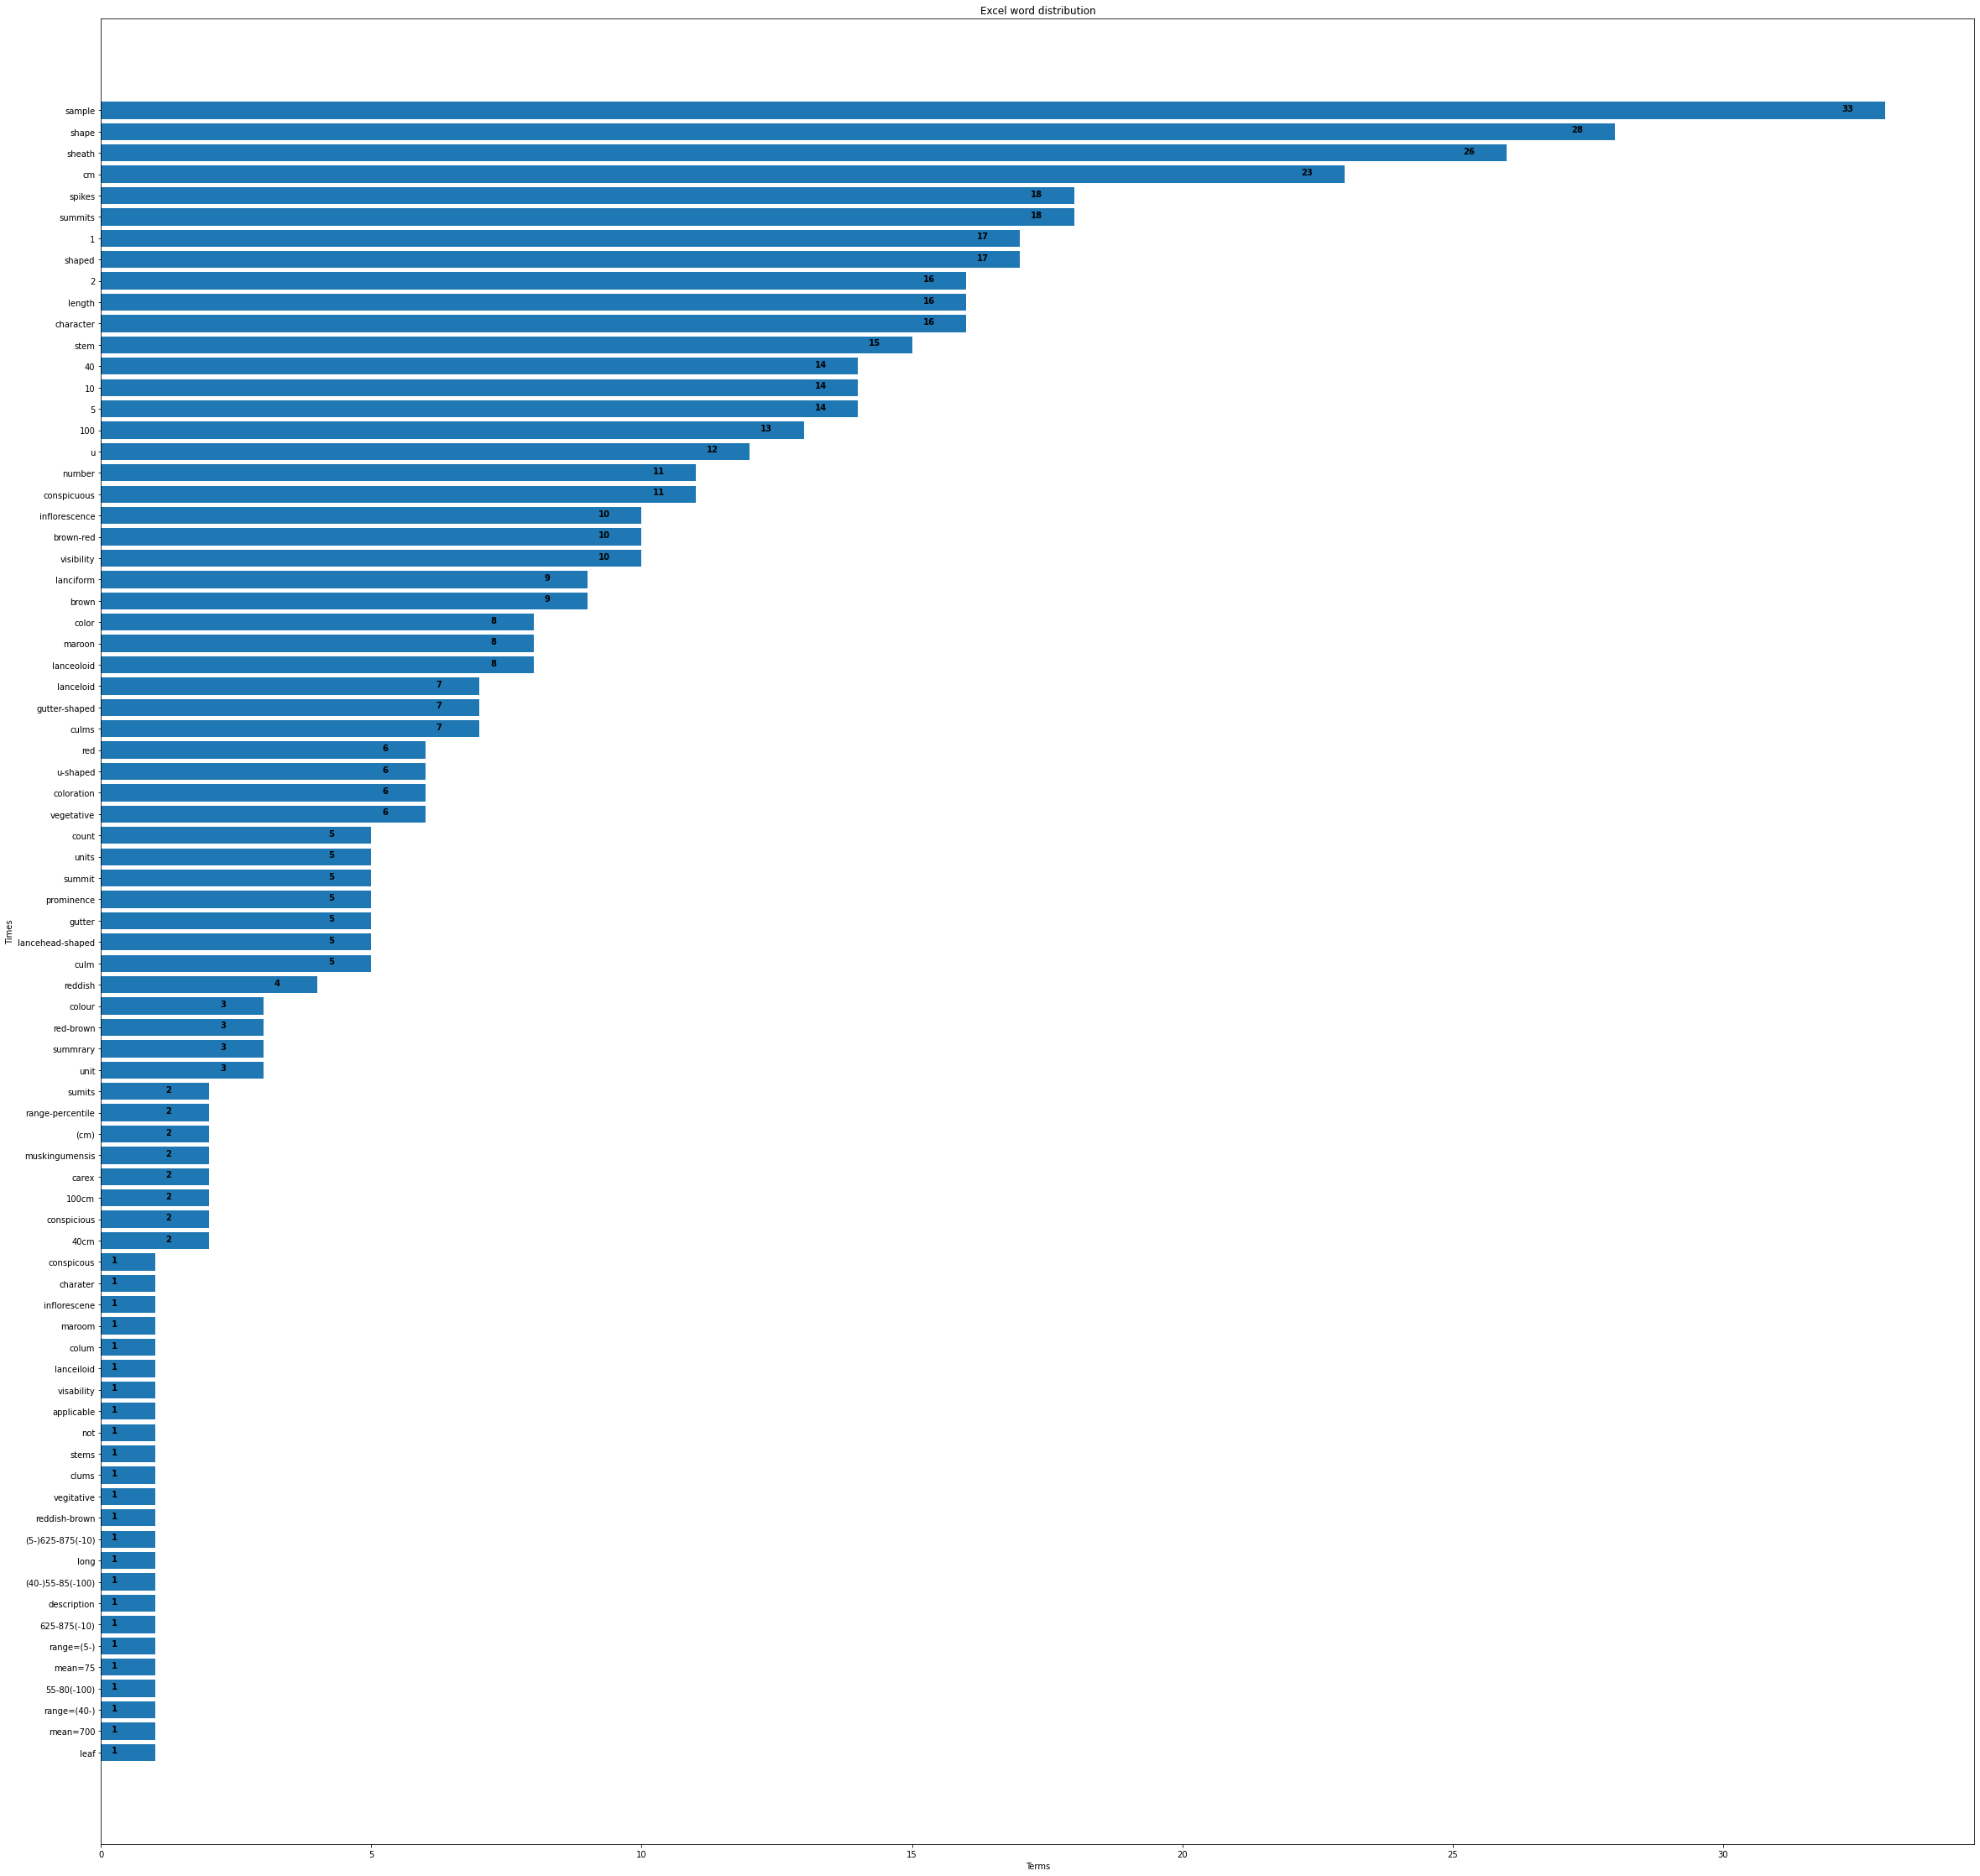

In [56]:
# draw bar chart
data = last_orders
names = list(data.keys())
values = list(data.values())

plt.figure(figsize=(40, 40))
plt.barh(range(len(data)), values, tick_label=names)
plt.title("Excel word distribution")
plt.xlabel("Terms")
plt.ylabel("Times")

# show how many times those term been used in the experiment
for i, v in enumerate(values):
    plt.text(v - 0.8, i - 0.03 , str(v), color='black', fontweight='bold')

plt.savefig(os.path.join('Pics/Guilding Analysis/Q2/Ex_words_consistency.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


Read character recorder export

In [29]:
# Count cr words
def cr_word_detach():
    # read cr files and fill NA values as "of", trans interger to string
    folder = os.listdir("Experiment Files")
    folder.remove('.DS_Store')
    d={}

    for i in folder:
        test = pd.read_csv("Experiment Files/" + i + "/Carex muskingumensis/Carex muskingumensis.csv").astype(str)
        test = test.drop(columns=['Summary'])
        # remove stopwords (e.g., of, the, or) and create empty list to store values
        remove = ["of", "the", "or"]
        store = []

        # store non-na value into store
        for i in test:
            for p in test[i]:
                if p not in remove:
                    store.append(p.split())

        # store non-stopwords value into word_count
        word_count = []
        for q in store:
            for c in q:
                if c not in remove:
                    word_count.append(c)

        # store and count value, store those value and words into dictionary d
        for x in word_count:
            if not x in d:
                d[x]=1
            else:
                d[x]=d[x]+1
    return d

In [57]:
orders = cr_word_detach()
last_sort_orders = {}


# Store words as dictionary, and set key as lower key.
alphabet = dict()
# alphabet =  {k.lower(): v for k, v in last_orders.items()}

for p, q in orders.items():
    if p.lower() in alphabet:
       alphabet[p.lower()] = alphabet[p.lower()] + q
    else:
       alphabet[p.lower()] = q

# remove punctuation from orders and save those value into dictionary
sort_orders = sorted(alphabet.items(), key=lambda x: x[1], reverse=False)

# last_sort_orders will be the output dictionary for future useage
for i in sort_orders:
	last_sort_orders[i[0].replace(";", "")] = i[1]

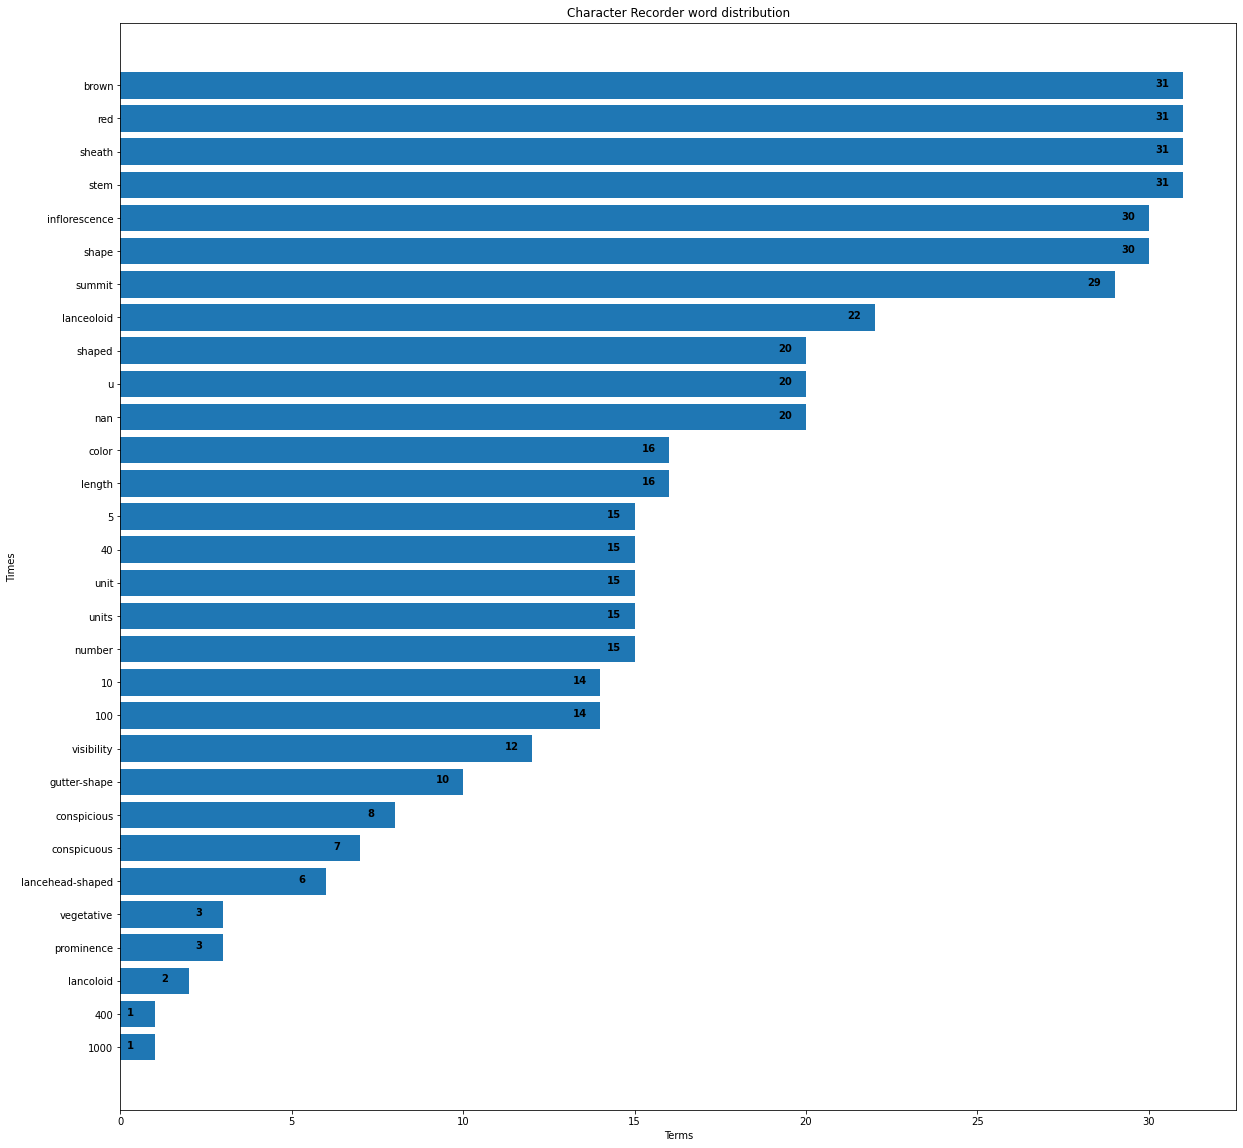

In [58]:
# draw bar chart
data = last_sort_orders
names = list(data.keys())
values = list(data.values())

plt.figure(figsize=(20, 20))
plt.barh(range(len(data)), values, tick_label=names)
plt.title("Character Recorder word distribution")
plt.xlabel("Terms")
plt.ylabel("Times")

# show how many times those term been used in the experiment
for i, v in enumerate(values):
    plt.text(v - 0.8, i - 0.03 , str(v), color='black', fontweight='bold')

plt.savefig(os.path.join('Pics/Guilding Analysis/Q2/Cr_words_consistency.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


**Q3** Will the user add new terms to the ontology while using Character Recorder? If so, how often?

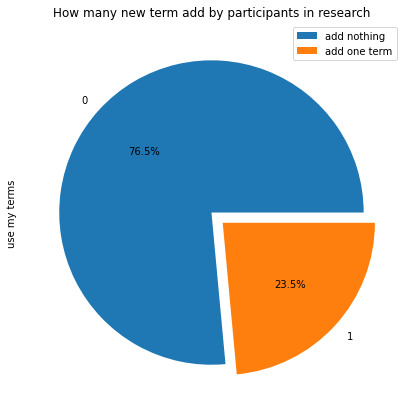

In [33]:
plt.figure(figsize=[9,7])
PA["use my terms"][1:].dropna().value_counts().plot.pie(explode = (0, 0.1), autopct='%1.1f%%')
plt.title("How many new term add by participants in research")

plt.legend(['add nothing', 'add one term'])

plt.savefig(os.path.join('Pics/Guilding Analysis/Q3/CR_new_term.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

**Q4** Will the terms added by different users to the ontology create conflicts in the ontology? If so, what kinds of conflict? and what are their relative frequency? 

**Q5** Will the user find the software intuitive to use and instructions clear and easy to follow?

As for answering this question. firstly, we should draw bar chart for each question. 

In [34]:
def missing_fill(question):

    if "almost always" not in question.keys():
        fill = pd.Series([0], index = ["almost always"])
        question = question.add(fill, fill_value=0)
    
    if "sometimes" not in question.keys():
        fill = pd.Series([0], index = ["sometimes"])
        question = question.add(fill, fill_value=0)
    
    if "rarely" not in question.keys():
        fill = pd.Series([0], index = ["rarely"])
        question = question.add(fill, fill_value=0)
    
    else:
        question = question

    return question

In [35]:
def missing_fill_2(question):

    if "good" not in question.keys():
        fill = pd.Series([0], index = ["good"])
        question = question.add(fill, fill_value=0)
    
    if "fair" not in question.keys():
        fill = pd.Series([0], index = ["fair"])
        question = question.add(fill, fill_value=0)
    
    if "poor" not in question.keys():
        fill = pd.Series([0], index = ["poor"])
        question = question.add(fill, fill_value=0)
    
    else:
        question = question

    return question

Q2#1 - Your experience with the main components of Character Recorder: - Did what I wanted it to do

In [36]:
SA = pd.read_csv('Files/CR-shortanswer.csv')


In [37]:
def draw(value, group, Width):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
   
    barWidth = Width
    br = np.arange(3)
    
    for i in range(1, 6):
        q = value["Q2#" + str(group) + "_" + str(i)][18:34].value_counts()

        ax.bar(br, missing_fill(q)[['almost always', 'sometimes', 'rarely']], width = 0.25, label = value["Q2#" + str(group) + "_" + str(i)][0].split("-")[2])
        br = [x + barWidth for x in br]
        ax.legend()

    plt.xticks([r + barWidth for r in range(3)],
        ['almost always', 'sometimes', 'rarely'])

Text(0.5, 1.0, "User's experiences - Did what I wanted it to do")

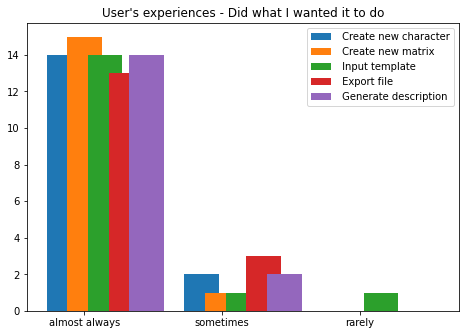

In [38]:
draw(SA, 1, 0.15)

plt.savefig(os.path.join('Pics/Guilding Analysis/Q5/Did what I wanted it to do.png'), dpi=300, format='png', bbox_inches='tight')
plt.title("User's experiences - Did what I wanted it to do")

Q2#2 - Your experience with the main components of Character Recorder: - Responded quickly

Text(0.5, 1.0, "User's experiences - Responded quickly")

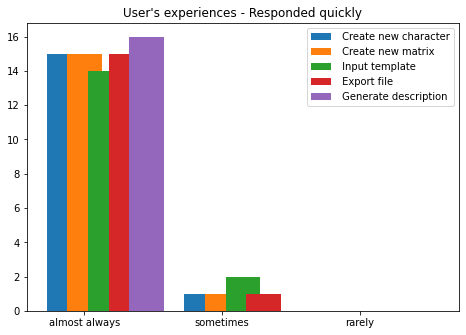

In [39]:
draw(SA, 2, 0.15)

plt.savefig(os.path.join('Pics/Guilding Analysis/Q5/Responded quickly.png'), dpi=300, format='png', bbox_inches='tight')
plt.title("User's experiences - Responded quickly")

Q2#3 - Your experience with the main components of Character Recorder: - My experience with it was

In [40]:
def draw2(value, group, Width):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    barWidth = Width
    br = np.arange(3)
    
    for i in range(1, 6):
        q = value["Q2#" + str(group) + "_" +str(i)][18:34].value_counts()

        ax.bar(br, missing_fill_2(q)[['good', 'fair', 'poor']], width = 0.25, label = value["Q2#" + str(group) + "_" +str(i)][0].split("-")[2])
        br = [x + barWidth for x in br]
        ax.legend()

    plt.xticks([r + barWidth for r in range(3)],
        ['good', 'fair', 'poor'])

Text(0.5, 1.0, "User's experiences - My experience with it was")

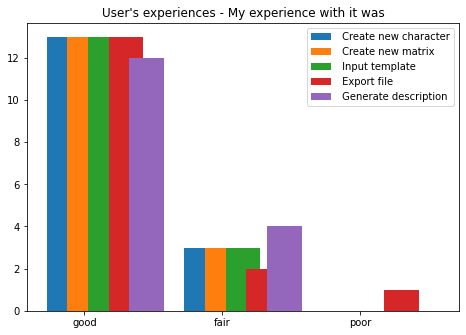

In [41]:
draw2(SA, 3, 0.15)

plt.savefig(os.path.join('Pics/Guilding Analysis/Q5/My experience with it was.png'), dpi=300, format='png', bbox_inches='tight')
plt.title("User's experiences - My experience with it was")

Q3 - Your experience with features of Character Recorder (CR):

In [42]:
def missing_fill_3(question):

    if "Strongly agree" not in question.keys():
        fill = pd.Series([0], index = ["Strongly agree"])
        question = question.add(fill, fill_value=0)
    
    if "Agree" not in question.keys():
        fill = pd.Series([0], index = ["Agree"])
        question = question.add(fill, fill_value=0)
    
    if "Somewhat agree" not in question.keys():
        fill = pd.Series([0], index = ["Somewhat agree"])
        question = question.add(fill, fill_value=0)
    
    if "Neither agree nor disagree" not in question.keys():
        fill = pd.Series([0], index = ["Neither agree nor disagree"])
        question = question.add(fill, fill_value=0)
    
    if "Somewhat disagree" not in question.keys():
        fill = pd.Series([0], index = ["Somewhat disagree"])
        question = question.add(fill, fill_value=0)
    
    if "Disagree" not in question.keys():
        fill = pd.Series([0], index = ["Disagree"])
        question = question.add(fill, fill_value=0)
    
    if "Strongly disagree" not in question.keys():
        fill = pd.Series([0], index = ["Strongly disagree"])
        question = question.add(fill, fill_value=0)

    else:
        question = question

    return question

In [43]:
def draw3(value, Width, xlabel, start, end):
    fig = plt.figure(figsize=[15, 15])
    ax = fig.add_axes([0,0,1,1])

    barWidth = Width
    br = np.arange(7)
    
    for i in range(start, end):
        q = value["Q3_" + str(i)][18:34].value_counts()

        ax.bar(br, missing_fill_3(q), width = 0.1, label = value["Q3_" + str(i)][0].split("-")[1])
        ax.margins(x=0.1)
        br = [x + barWidth for x in br]
        ax.legend()
        #ax.legend(title='Columns', bbox_to_anchor=(1, 1.02), loc='upper left')
    
    plt.xticks([r + barWidth for r in range(7)],
        xlabel)

Text(0.5, 1.0, "User's experience with features of Character Recorder (CR) Part one")

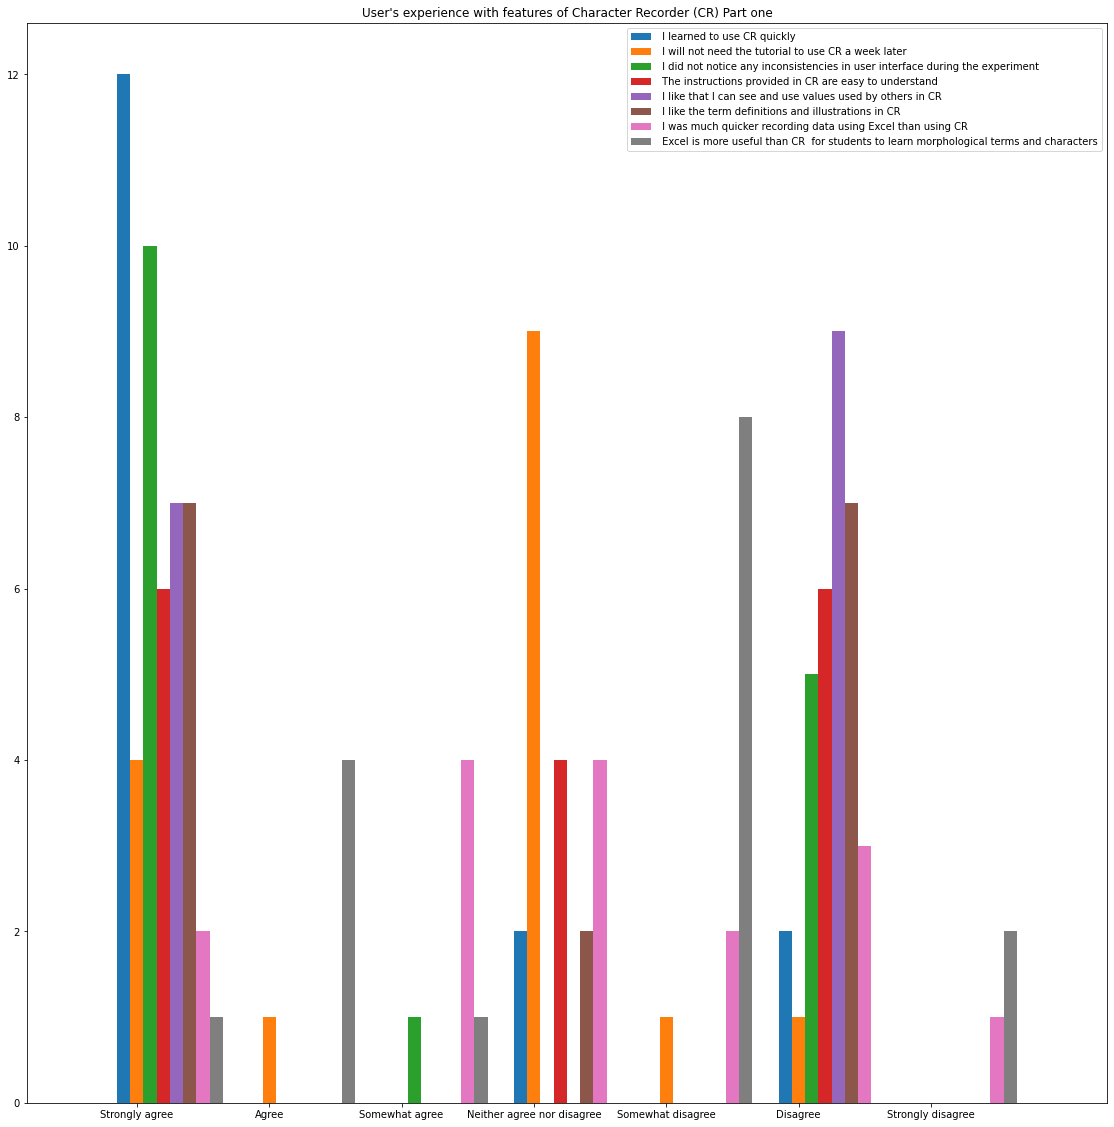

In [44]:
a = ['Strongly agree','Agree', 'Somewhat agree', 'Neither agree nor disagree',
       'Somewhat disagree', 'Disagree', 'Strongly disagree']


draw3(SA, 0.1, a, 1, 9)

plt.title("User's experience with features of Character Recorder (CR) Part one")

Text(0.5, 1.0, "User's experience with features of Character Recorder (CR) Part two")

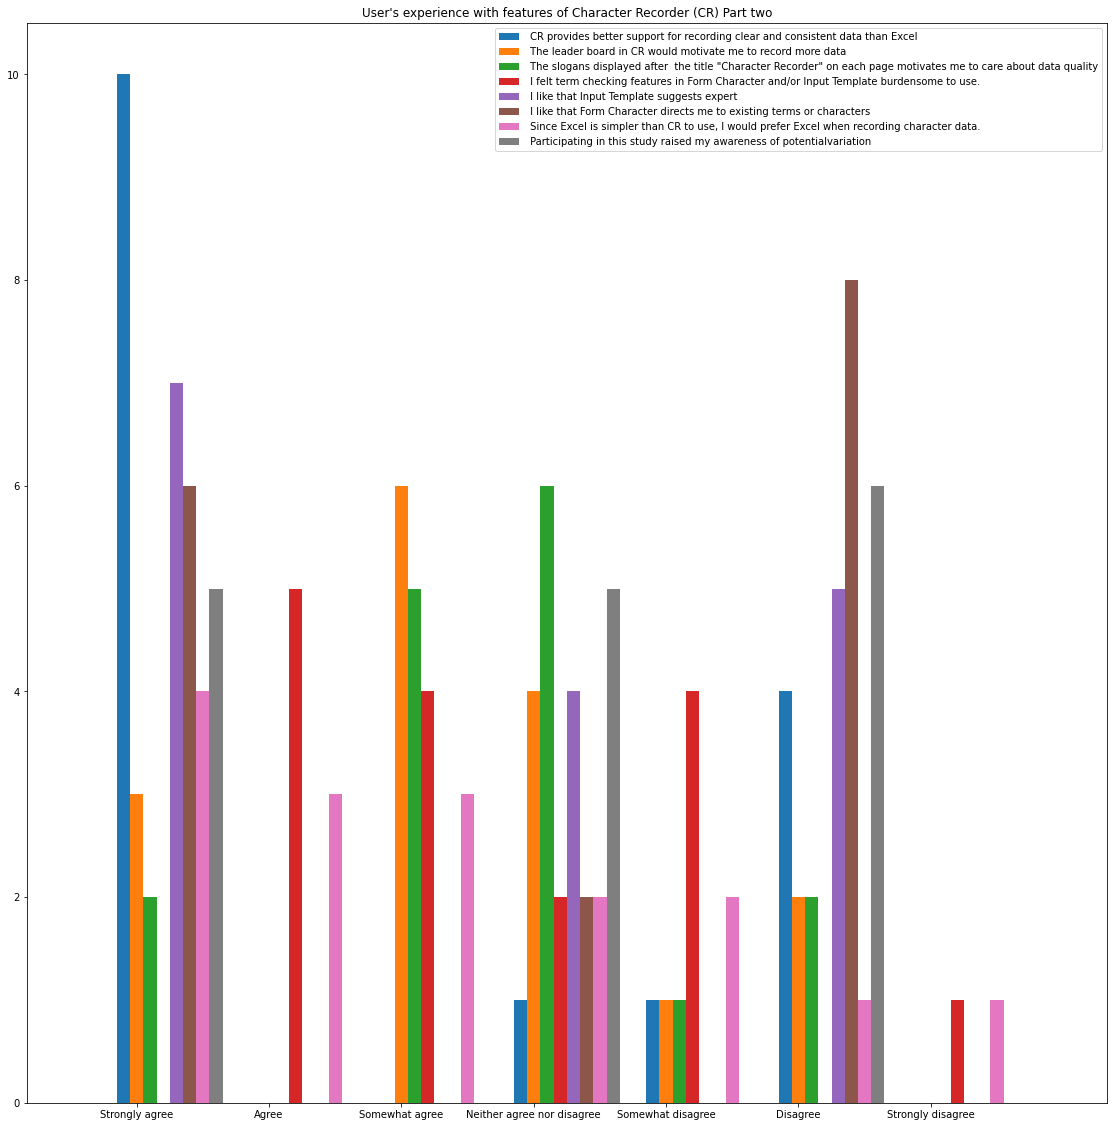

In [45]:
draw3(SA, 0.1, a, 9, 17)
plt.title("User's experience with features of Character Recorder (CR) Part two")

Q6 - Your perceived task load with Character Recorder (CR)

In [46]:
df = pd.DataFrame(SA[["Q14_1", "Q14_2", "Q14_3", "Q14_4"]][18:34], columns=["Q14_1", "Q14_2", "Q14_3", "Q14_4"])
df.rename(columns={'Q14_1': "Mental Demand", 'Q14_2': 'Performance', 'Q14_3': 'Effort', 'Q14_4': 'Frustration'}, inplace=True)

df

,Mental Demand,Performance,Effort,Frustration
18,3,8,3,3
19,3,Much stronger than Excel\n9,4,Much stronger than Excel\n9
20,Same as Excel\n5,8,3,2
21,Same as Excel\n5,Much stronger than Excel\n9,Same as Excel\n5,Same as Excel\n5
22,Same as Excel\n5,4,6,4
23,6,7,7,4
24,Same as Excel\n5,6,4,4
25,8,6,7,6
26,8,6,7,8
27,8,Much stronger than Excel\n9,8,7


In [47]:
scales = ["Much weaker than Excel\n1", "2", "3","4","Same as Excel\n5","6","7","8","Much stronger than Excel\n9"]

In [48]:
a = [i for i in range (9, 0, -1)]
b = [p for p in range (0, 15)]
c = a + b

v = [d for d in range(0, 27)]

Text(0.5, 1.0, "User's perceived task load with Character Recorder (compare with Excel)")

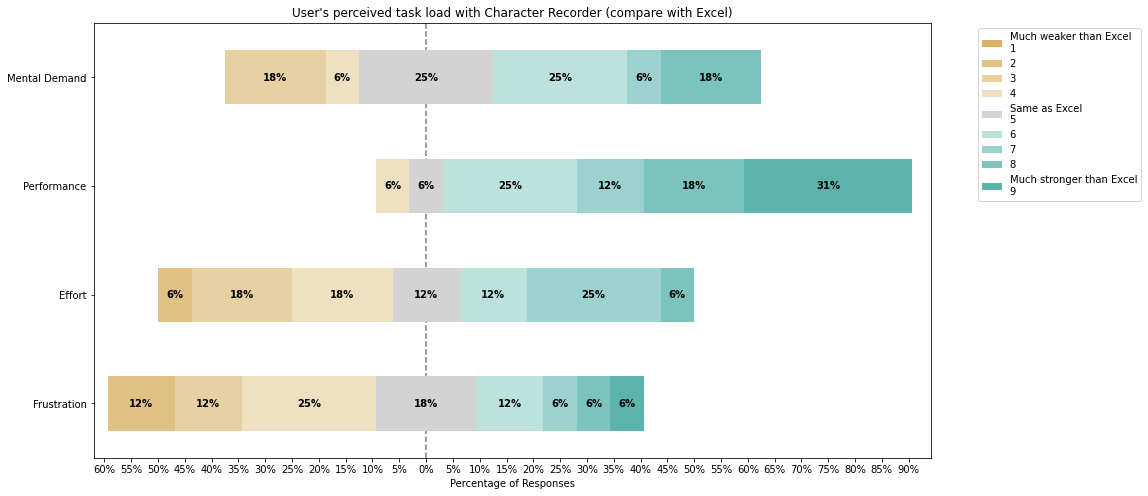

In [49]:
plot_likert.plot_likert(df, scales,figsize=(15,8), plot_percentage= True,
                        bar_labels=True, bar_labels_color="black", colors=plot_likert.colors.likert9)

plt.savefig(os.path.join('Pics/Guilding Analysis/Q6/User perceived task (ratio).png'), dpi=300, format='png', bbox_inches='tight')
plt.title("User's perceived task load with Character Recorder (compare with Excel)")

Text(0.5, 1.0, "User's perceived task load with Character Recorder (compare with Excel)")

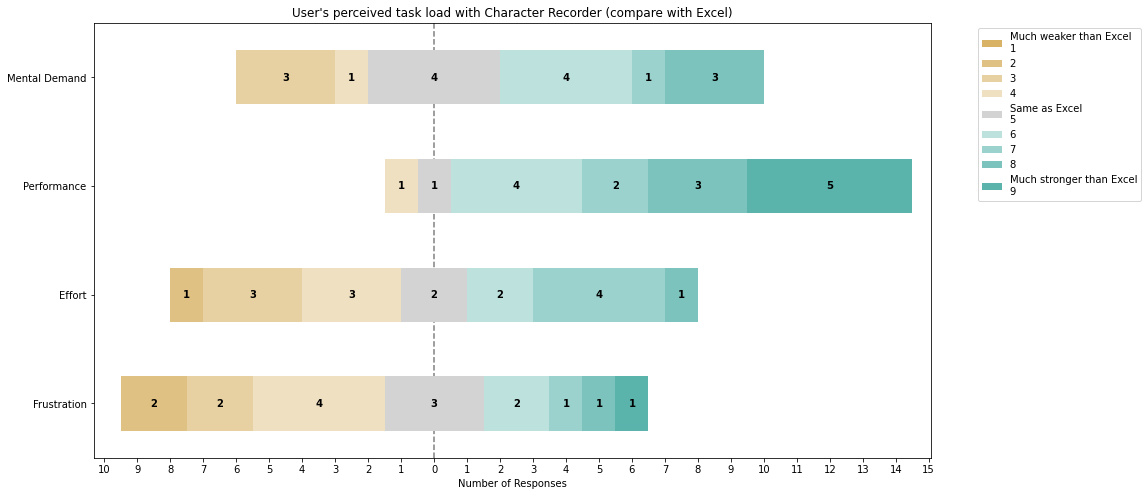

In [50]:
plot_likert.plot_likert(df, scales,figsize=(15,8), 
                        bar_labels=True, bar_labels_color="black", colors=plot_likert.colors.likert9)

plt.savefig(os.path.join('Pics/Guilding Analysis/Q6/User perceived task (times)).png'), dpi=300, format='png', bbox_inches='tight')
plt.title("User's perceived task load with Character Recorder (compare with Excel)")